In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
student_file = os.path.join("..", "data", "processed", "Cleaned_master_student_list_final.xlsx")
df = pd.read_excel(student_file)
df = df[['ANL1 Fc Grade', 'dropped out']].dropna()

# Map the dropout status to binary values
dropout = df['dropped out'].map({'yes': 1, 'no': 0}) 

# Calculate Point Biserial Correlation
correlation, p_value = stats.pointbiserialr(dropout, df['ANL1 Fc Grade'])
print(f'Point Biserial Correlation: {correlation}, P-value: {p_value}')


Point Biserial Correlation: -0.3376292077376449, P-value: 8.214463592849916e-09


Optimization terminated successfully.
         Current function value: 0.626250
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            dropped out   No. Observations:                  277
Model:                          Logit   Df Residuals:                      275
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                 0.08714
Time:                        19:18:57   Log-Likelihood:                -173.47
converged:                       True   LL-Null:                       -190.03
Covariance Type:            nonrobust   LLR p-value:                 8.662e-09
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.7565      0.389      4.515      0.000       0.994       2.519
ANL1 Fc Grade    -0.

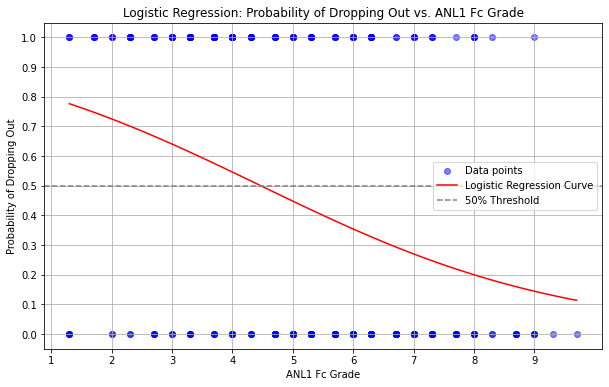

In [18]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Cleaned_master_student_list_final.xlsx")
df = pd.read_excel(student_file)

# Drop rows with NaN values in the specified columns
df = df[['ANL1 Fc Grade', 'dropped out']].dropna()

# Map dropout status to binary
dropout = df['dropped out'].map({'yes': 1, 'no': 0}) 
X = df[['ANL1 Fc Grade']]
X = sm.add_constant(X)
y = dropout

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

# Generate predictions for the range of grades
X_range = np.linspace(X['ANL1 Fc Grade'].min(), X['ANL1 Fc Grade'].max(), 100)
X_range_with_const = sm.add_constant(X_range)  # Add constant for the intercept
predictions = result.predict(X_range_with_const)  # Get predicted probabilities

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['ANL1 Fc Grade'], dropout, label='Data points', color='blue', alpha=0.5)  # Scatter plot of data
plt.plot(X_range, predictions, color='red', label='Logistic Regression Curve')  # Logistic regression curve
plt.xlabel('ANL1 Fc Grade')
plt.ylabel('Probability of Dropping Out')
plt.title('Logistic Regression: Probability of Dropping Out vs. ANL1 Fc Grade')
plt.xticks(np.arange(int(X['ANL1 Fc Grade'].min()), int(X['ANL1 Fc Grade'].max()) + 1, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.5, linestyle='--', color='grey', label='50% Threshold')  # Threshold line
plt.legend()
plt.grid()
plt.show()
